# Deep Learning 101

<div class="alert alert-success">
This lecture takes a practical approach to introduce modern deep learning approaches.  It provides foundational deep learning knowledge in order for you to move onto time series forecasting.
</div>

**By the end of this lecture you will have:**
    
* Developed a conceptual understanding of modern deep neural networks.
* Built intuition about what hidden layers within a deep network are doing and how they aid prediction.
* Understand the definition and benefits of mini batches of training data
* Built intuition about networks 'learn' using the backpropogation algorithm
* Learnt how to build deep learning models in Keras and Tensorflow 2.0
* The foundational knowledge to move onto using feedforward neural networks for time series forecasting.

# Standard Imports

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Keras and Tensorflow Imports

For your deep learning you will make use of [Keras](https://keras.io/).  This is a python library that sits on top of Google's deep learning toolset: Tensorflow 2.0.  Keras makes deep learning relatively straightfoward because it hides a lot of the complexity of Tensorflow. 

> Another very powerful deep learning framework is [PyTorch](https://pytorch.org/).  This is a pythonic deep learning toolkit and is also very powerful.  Our research experience is that PyTorch is more efficient than Keras and Tensorflow (sometimes by a considerable margin), but that it requires more code to do the same things as Keras.  Another way to look at this is that Keras comes with 'more bells and whistles' than PyTorch and for learning that comes in very handy!  The exercises that you will tackle in this course are written in Keras/TF, but you will also have access to optional material written in PyTorch.

In [2]:
import tensorflow as tf
from tensorflow import keras

#if using hds_forecast this should be version 2.0+
print(tf.__version__)

2.0.0


# Computational cost of deep learning

When you have a complex deep learning architecture (which isn't always the case) and lots of data you should expect it to be more computationally expensive (take longer to run and work your CPU hard) than other types of ML.  In these instances, you really need a powerful machine and for some models a GPU.  For **time series forecasting**, we will be using the OpenStack on the High Performance Cluster, but for personal learning and coursework you can also make use of Google Colaboratory (Jupyter in the cloud).  Google also provide a GPU.  All of the neural network notebooks in this course are runnable in Google Colab. 

# A first look at Deep Learning using Tensorflow Playground

[Tensorflow playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.55467&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) is provided by Google.  I recommend that you spend some time using it as it helps build intuition about how deep learning works.

# Components needed for deep learning.

## 1. Training and test data

The data for this lecture is a real dataset known as the 'Wisconsin Breast Cancer' dataset. The data set consists of individual   we will use a **Feedforward Neural Network Architecture.**

The data are published and open; feel free to take a look at them in more detail.

In [52]:
url = 'https://raw.githubusercontent.com/MichaelAllen1966/synthetic_data_pilot/main/01_wisconsin/wisconsin.csv'
cancer = pd.read_csv(url)

In [53]:
# Load data and drop 'id' column
cancer.drop('id', axis=1, inplace=True)

# Change 'diagnosis' column to 'malignant', and put in last column place
cancer['malignant'] = cancer['diagnosis'] == 'M'
cancer.drop('diagnosis', axis=1, inplace=True)

In [54]:
# 30 features and a single binary (0/1) label
cancer.shape

(569, 31)

In [57]:
cancer.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,malignant
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,True
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,True
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,True
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,True
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,True


# Rescaled data

In [58]:
from sklearn.preprocessing import MinMaxScaler

In [63]:
tocancer[]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [64]:
to_rescale = cancer.columns[:-1]

#create dataframe of quantitative data to rescale 0 - 1
df_to_rescale = cancer[to_rescale]

#dataframe of y variable
y = cancer['malignant']

In [66]:
# do the rescaling and assign to dataframe
scaler = MinMaxScaler()
scaler.fit(df_to_rescale)
X_scaled = pd.DataFrame(scaler.transform(df_to_rescale))
X_scaled.columns = df_to_rescale.columns

#take a look at the rescaled data
print(X_scaled.shape)
X_scaled.head()

(569, 30)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


# Train-Test Split

Just like other Machine Learning approaches we first do a train test split (and do not look at or use our test data until we are ready!).

In [67]:
from sklearn.model_selection import train_test_split

In [70]:
#setting random_state means we always get the same split
X_train, X_test, y_train, y_test \
    = train_test_split(X_scaled.to_numpy(), y.to_numpy(), 
                       test_size=0.20, 
                       random_state=42)

In [71]:
print(X_train.shape)
print(X_test.shape)

(455, 30)
(114, 30)


## Sequential layers and activation functions

Feedforward neural networks accept a vector of quantitative values as input and pass this through a sequence of fully connected layers (all neurons are connected to each other).  Each neuron in a layer recieves input from all of the neurons in the previous layer. The neuron weights the input vector, adds bias and then passes it through an activation function. In a hidden layer, for example, you could use a Rectified Linear Unit (ReLU).  

The final layer is an **output** layer.  The thrombolysis example is a binary classification so the output layer is a fully connected layer with a single neuron.  You will need to use a `sigmoid` activation function to provide a probability of recieving thromboysis between 0.0 and 1.0.

For feedforward networks, `Keras` provides simple classes to help you construct your model.

In [88]:
#a model consisting of a sequential set of layers
from tensorflow.keras.models import Sequential

#a fully connected layer, an input layer and a Dropout layer
from tensorflow.keras.layers import Dense, Input, Dropout

In [135]:
#The first input
model = Sequential(name='breast_cancer_nn')

#input layer.
model.add(Input(shape=(X_train.shape[1],)))

#hidden layer 1 
model.add(Dense(units=10, activation='relu'))

#hidden layer 2
model.add(Dense(units=10, activation='relu'))
#model.add(Dropout(0.2))

#hidden layer 3
#model.add(Dense(units=10, activation='relu'))
#model.add(Dropout(0.2))

#hidden layer 4
#model.add(Dense(units=10, activation='relu'))

#output layer
model.add(Dense(units=1, activation='sigmoid'))

#summay includeing number of trainable parameters
model.summary()
          

Model: "breast_cancer_nn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_64 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_65 (Dense)             (None, 1)                 11        
Total params: 431
Trainable params: 431
Non-trainable params: 0
_________________________________________________________________


# Training a network

For each neuron you can think of the weights as the **strength** of the neuron's **connections** to all of the neurons in the **previous layer**.  The network is initialised with these weights set to **random** values.  The purpose of training is therefore to find the 'best' weights for your prediction problem.   

> In this context, 'best' means the weights that minimise the training **loss**.  Loss is a measure of model fit i.e. a metric quantifying the difference between the predictions from the model and the ground truth observations. For the thrombolysis example 


To define:

EPOCHS

mini batches

In [136]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#change 
results = model.fit(x=X_train, 
                    y=y_train, 
                    batch_size=32,
                    validation_split=0.10, 
                    epochs=200, 
                    verbose=0)

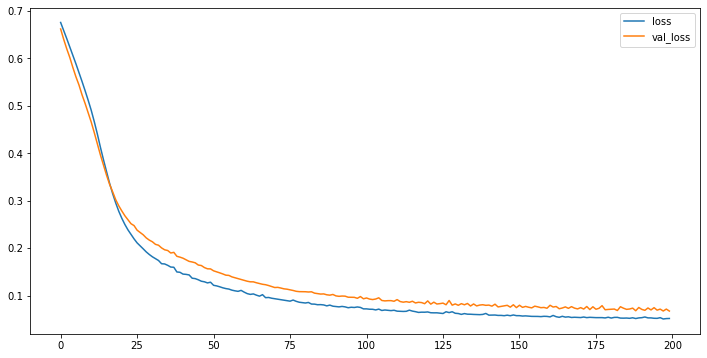

In [137]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))
ax.plot(results.history['loss'])
ax.plot(results.history['val_loss'])
ax.legend(['loss', 'val_loss'])

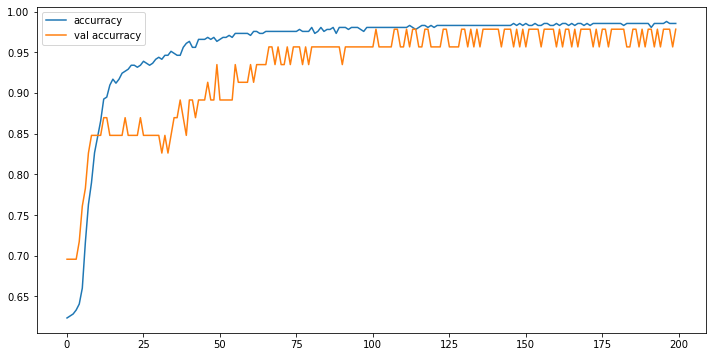

In [138]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))
ax.plot(results.history['accuracy'])
ax.plot(results.history['val_accuracy'])
ax.legend(['accurracy', 'val accurracy'])

In [ ]:
# Actions to avoid overfitting

In [145]:
from tensorflow.keras.callbacks import EarlyStopping

In [142]:
def get_model(input_size, n_hidden=2, n_neurons=10, activation='relu', 
              dropout=True, d_rate=0.2):
    #The first input
    model = Sequential(name='breast_cancer_nn')

    #input layer.
    model.add(Input(shape=(input_size,)))

    for i in range(n_hidden):
        #hidden layer 1 
        model.add(Dense(units=n_neurons, activation=activation))
        #include a dropout layer
        if dropout:
            model.add(Dropout(d_rate))
    
    #output layer
    model.add(Dense(units=1, activation='sigmoid'))
    
    return model

In [154]:
#get the custom feedforward model
model_2 = get_model(input_size=X_train.shape[1], 
                    n_hidden=2,
                    n_neurons=10,
                    dropout=True,
                    d_rate=0.2)

#summary
print(model_2.summary())

#compile the new model
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#create an early stopping callback
es = EarlyStopping(monitor='val_loss', 
                   patience=5,
                   restore_best_weights=True)

#fit the model and also pass in the callback; fit silently
results = model_2.fit(x=X_train, 
                    y=y_train, 
                    batch_size=32,
                    validation_split=0.10, 
                    epochs=200, 
                    verbose=0,
                    callbacks=[es])


Model: "breast_cancer_nn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_87 (Dense)             (None, 10)                310       
_________________________________________________________________
dropout_24 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_88 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_25 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_89 (Dense)             (None, 1)                 11        
Total params: 431
Trainable params: 431
Non-trainable params: 0
_________________________________________________________________
None


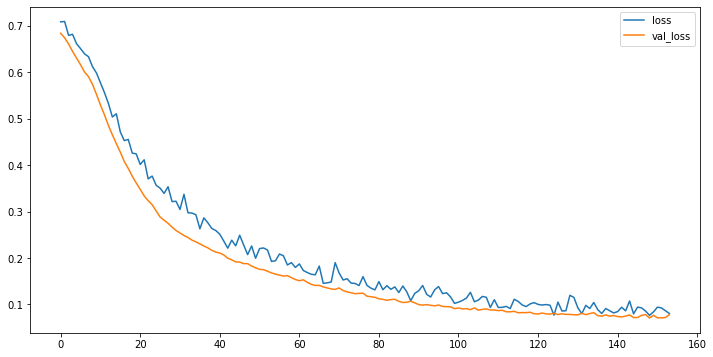

In [155]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))
ax.plot(results.history['loss'])
ax.plot(results.history['val_loss'])
ax.legend(['loss', 'val_loss'])

# Sklearn imports

> The above is called a forward pass.  But the real innovation in deep learning came from the backpropagation algorithm.  Backprop provides a way for a neural network to `learn` the weights that minimise the   